In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import sys
from typing import Tuple

from dataclasses import dataclass

if '' in sys.path:
    sys.path.remove('')

module_path = os.path.abspath(os.path.join('../python'))
if module_path not in sys.path:
    sys.path.append(module_path)

import networkx as nx

from graphPlot import drawGraph, setCanvas
from const import *

setCanvas()

# **Tensor Field Network** (and other ConvNet Generalisations)

*TDLS - Feb 11. 2019*

### **Chris Dryden**

- christopher.paul.dryden@gmail.com

- github.com/chrisdryden

### **Peng Cheng**

- pc175@uowmail.edu.au

- github.com/tribbloid

---

Notebook & sourcecode: [https://github.com/tribbloid/convnet-abstraction/tree/master/slide]()

## **Overview**

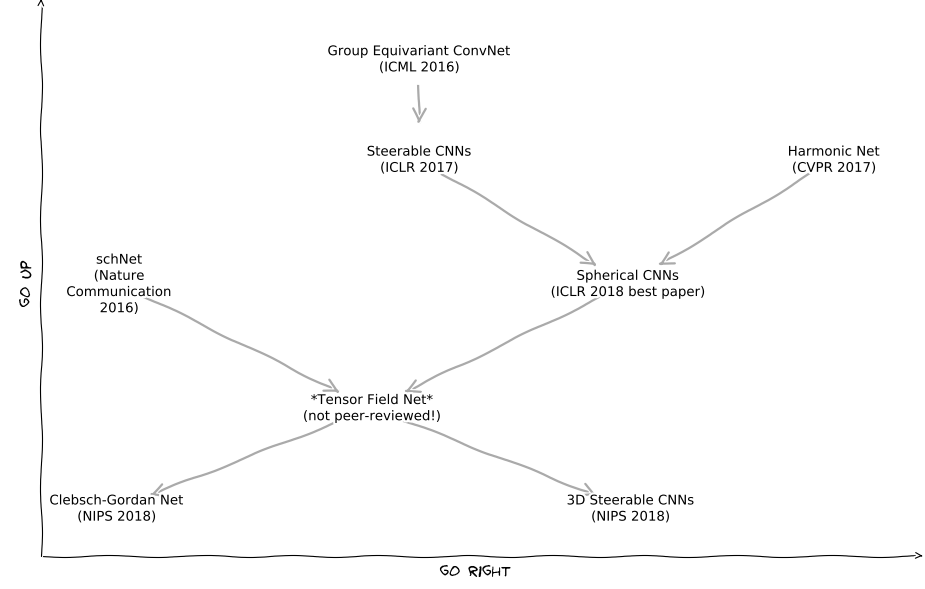

In [3]:

g = nx.DiGraph(directed=True)

schNet = "schNet\n(Nature\nCommunication\n2016)"
groupInv = "Group Equivariant ConvNet\n(ICML 2016)"
steerable = "Steerable CNNs\n(ICLR 2017)"
harmonic = "Harmonic Net\n(CVPR 2017)"
spherical = "Spherical CNNs\n(ICLR 2018 best paper)"
tensorField = "*Tensor Field Net*\n(not peer-reviewed!)"
cgNet = "Clebsch-Gordan Net\n(NIPS 2018)"
threeDSteerable = "3D Steerable CNNs\n(NIPS 2018)"

g.add_edge(schNet, tensorField)
g.add_edge(groupInv, steerable)
g.add_edge(harmonic, spherical)
g.add_edge(steerable, spherical)
g.add_edge(spherical, tensorField)
g.add_edge(tensorField, cgNet)
g.add_edge(tensorField, threeDSteerable)

drawGraph(g)

plt.show()

## Pre-ConvNet (1960-1987)

<img src="assets/winterIsComing.jpg">


## Pre-ConvNet - Linear/Fully Connected/~~Dense/Perceptron~~ Layer

In pursuing of unbounded representation/approximation power

---

\begin{align}
& f_+(y) = \Phi \Big( f(x) \Big) &= \phi \Big( \sum_{x \in \text{domain}} f(x) w(x, y) \Big) \\
& &= \phi \Big( \bbox[yellow]{< f(x), w(x, y) >_x} \Big)
\end{align}

($w$ are weight of neurons)

## Pre-ConvNet - Linear/Fully Connected Layer


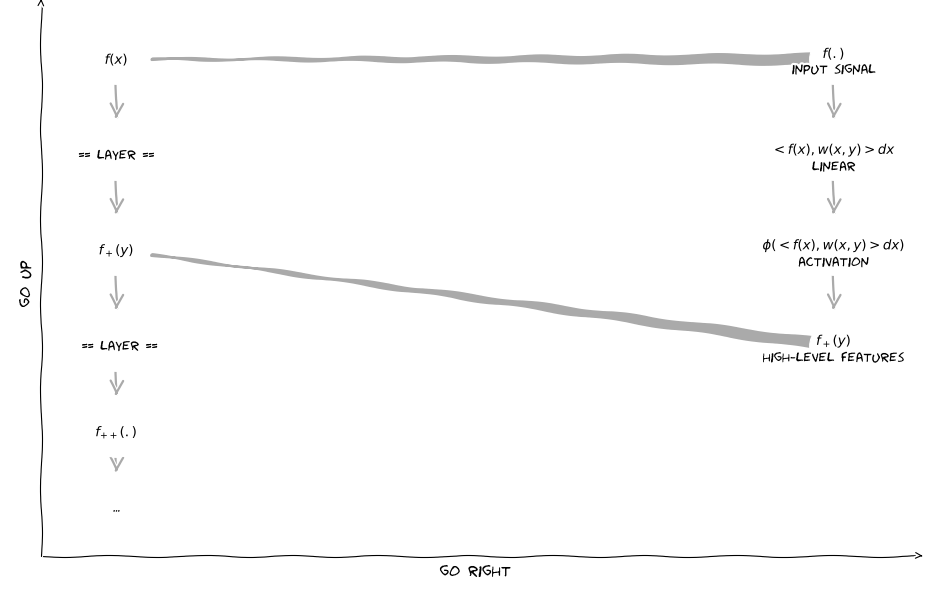

In [4]:


g = nx.DiGraph(directed=True)

g.add_edge("$f(x)$", "== layer ==")
g.add_edge("== layer ==", "$f_+(y)$")
g.add_edge("$f_+(y)$", " == layer ==")
g.add_edge(" == layer ==", "$f_{++}(.)$")
g.add_edge("$f_{++}(.)$", "...")

dot = "$f(.)$\ninput signal"
fc = "$<f(x), w(x, y)> d x$\nlinear"
nl = "$\phi(<f(x), w(x, y)> d x)$\nactivation"
dot2 = "$f_+(y)$\nhigh-level features"
# hw = "highway?"

g.add_edge(dot, fc)
g.add_edge(fc, nl)
g.add_edge(nl, dot2)

g2 = g.copy()

g2.add_edge(dot, "$f(x)$", wedge=True)
g2.add_edge(dot2, "$f_+(y)$", wedge=True)

drawGraph(g2, g, font_family='humor sans')

plt.show()

## Pre-ConvNet - Linear/Fully Connected Layer

<img src="assets/kardashian-counterexample.png" style="height: 400px;">

---
 
[*] Image courtesy https://www.quora.com/What-is-the-difference-between-equivariance-and-invariance-in-Convolution-neural-networks

## Invariant Layer / Bag-of-words?

- Don't do this

<img src="assets/picassoEffect.jpg">

---

[*] Image Courtesy: https://www.amazon.ca/Pablo-Art-Masters-Julie-Birmant/dp/1906838941


## Data Augmentation

- Good catch

<img src="assets/data-aug.png">


## Data Augmentation

- Too slow in practice
    - In **convex case** SGD "theoretically probably" converges equally fast
    - otherwise it "kind of works" but with much less efficiency

--- 

- Time & space complexity increase exponentially with the dimensionality of augmentation

| <img src="assets/image-pan.gif" style="height: 400px;"> |
| :---: |
| 2D translation |


## Data Augmentation

- Time & space complexity increase exponentially with the dimensionality of augmentation

| <img src="assets/human-0g.jpg"> |
| :---: |
| 2D translation x 1D rotation, no gravity |


## Data Augmentation

- Time & space complexity increase exponentially with the dimensionality of augmentation

| <img src="assets/drone-overhead.png" style="height: 400px;"> |
| :---: |
| 2D translation $\times$ 1D rotation, gravity perpendicular to domain |


## Data Augmentation

- Time & space complexity increase exponentially with the dimensionality of augmentation

| <img src="assets/fisheye-pan.gif" style="height: 400px;"> |
| :---: |
| 3D rotation


## Data Augmentation

- Time & space complexity increase exponentially with the dimensionality of augmentation

| <img src="assets/airr.png" style="height: 400px;"> |
| :---: |
| 4D affine transformations |

---

[*] Image Courtesy: AIRR https://thedroneracingleague.com/airr/

## Data Augmentation

- Time & space complexity increase exponentially with the dimensionality of augmentation

| <img src="assets/point-cloud-6d.gif" style="height: 400px;"> |
| :---: |
| 3D translation $\times$ 3D rotation |


## Data Augmentation

- Time & space complexity increase exponentially with the dimensionality of augmentation

| <img src="assets/IAS-vs-TAS.jpg" style="height: 400px;"> |
| :---: |
| Air pressure depending on translation |


## Data Augmentation

How about a better idea?

- Instead of augmenting, we hard-bake such prior knowledge into the network to yield identical result!

| <img src="assets/aerial-g-conv.jpg" style="height: 200px;"> |
| --- |


Augmentation types | Answer
 --- | --- 
2d translation | ConvNet
**others** | **G-ConvNet**
- 2d translation + 90$^{\circ}$ rotation | Group Equivariant CNNs
- 2d translation + rotation | Harmonic Net
- 3d rotation | Spherical CNNs
- 3d translation + rotation | Tensor Field Net


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import sys
from typing import Tuple

from dataclasses import dataclass

if '' in sys.path:
    sys.path.remove('')

module_path = os.path.abspath(os.path.join('../python'))
if module_path not in sys.path:
    sys.path.append(module_path)

import networkx as nx

from graphPlot import drawGraph, setCanvas
from const import *

setCanvas()

In [3]:
import aug2conv
from mxnet.ndarray import NDArray
from mxnet.gluon.data import DataLoader
from mxnet.gluon.nn import Sequential
import utils.helper

data = aug2conv.getData()

imgs: NDArray
imgs, ls = next(data.__iter__())

Let's do a hello-world experiment on MNIST dataset:


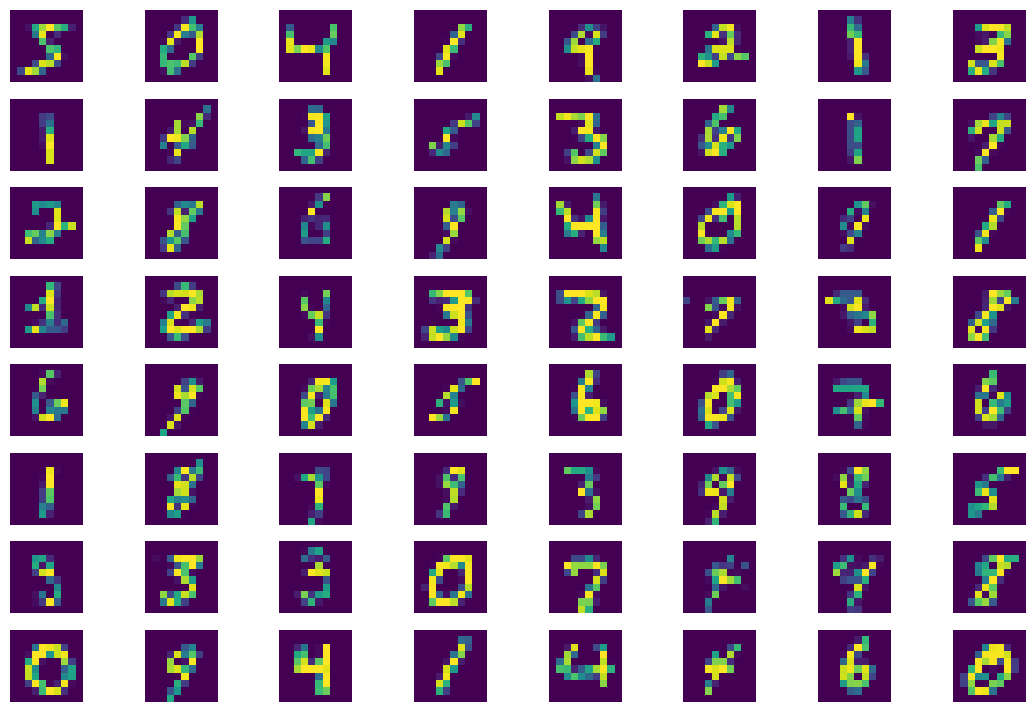

In [4]:
print("Let's do a hello-world experiment on MNIST dataset:")

slice = imgs[0:64]
utils.helper.viewWeights(slice)

... for which each image can be augmented until all cases are covered


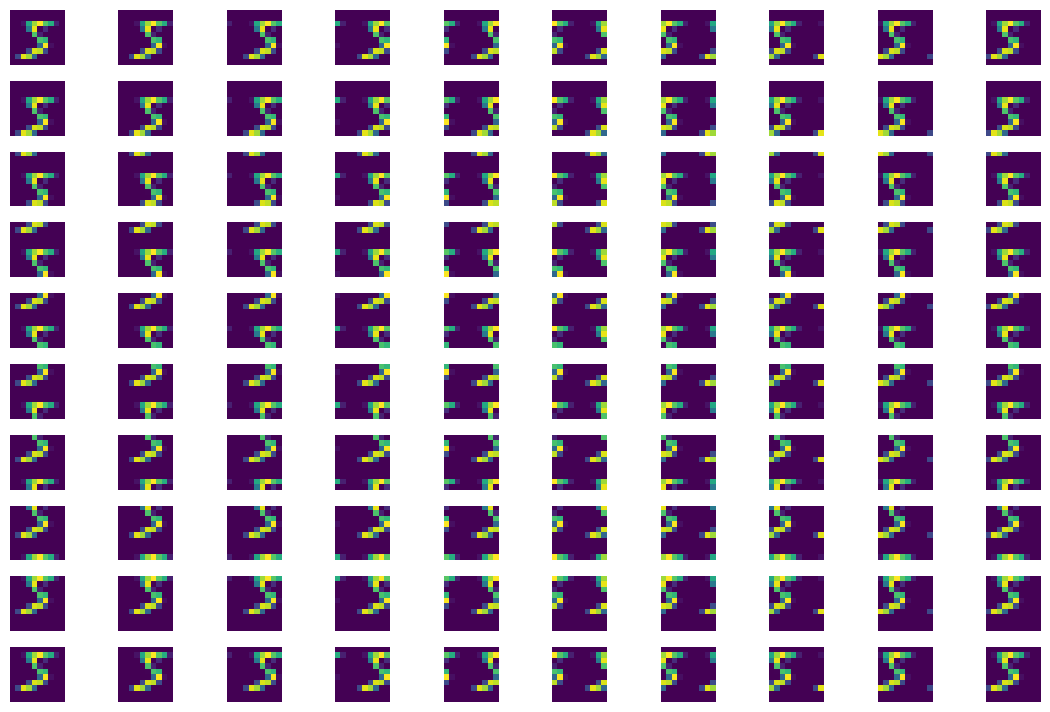

In [5]:
print("... for which each image can be augmented until all cases are covered")

img1 = imgs[0].squeeze(axis=(0,))
augmenter = aug2conv.Augmenter(img1)
auggedUp = augmenter.aug1(img1)
utils.helper.viewWeights(auggedUp)

## Start Learning!

### **2 layers only**

1. Highway only bypassing Linear/FC/~~Dense/Perceptron~~
    
    - Designed to break symmetry at saddle points*

    - WITHOUT initialisation (all weights start with 0)
    
    - 10x10 => 10x10 => ReLU

2. Plain old Linear/FC

    - 10x10 => one-hot 1~10 => ReLU
   
---

[*] Y. Li and Y. Yuan, “Convergence Analysis of Two-layer Neural Networks with ReLU Activation” NIPS 2017, pp. 1–11.

## Start Learning!

<img src="assets/skip1Net.png" width="400">

---

[*] Y. Li and Y. Yuan, “Convergence Analysis of Two-layer Neural Networks with ReLU Activation” NIPS 2017, pp. 1–11.

In [6]:

from mxnet import autograd, initializer
import mxnet.gluon as glu
from pathlib import Path

lossFn = glu.loss.SoftmaxCrossEntropyLoss()

In [7]:

@dataclass
class HWY(glu.HybridBlock):

    def __init__(self, layers: Tuple):
        super(HWY, self).__init__()
        self.delegate = glu.nn.HybridSequential()
        self.delegate.add(*layers)

    def getLayers(self):
        return list(self.delegate)

    def hybrid_forward(self, F, x, *args, **kwargs):
        r = self.delegate.forward(x, *args)
        return r + x.reshape(r.shape)

    def __hash__(self):
        return hash(self.delegate)

In [8]:
# Build a feed-forward network
# this goofy-looking skip architecture is from:
# [1] Y. Li and Y. Yuan, “Convergence Analysis of Two-layer Neural Networks with ReLU Activation,” no. Nips, pp. 1–11, 2017.
# designed to break symmetry

def newModel() -> glu.nn.HybridSequential:
    model = glu.nn.HybridSequential()
    # with model.name_scope():
    model.add(
        HWY((
            glu.nn.Dense(100),
        )),
        glu.nn.Activation('relu'),
        # Skip((
        #     glu.nn.Dense(100),
        # )),
        # glu.nn.Activation('relu'),
        glu.nn.Dense(10)
    )

    # init = initializer.Uniform()
    init = initializer.Zero()
    model.initialize(ctx=CTX, init=init)
    return model

Weight map before training


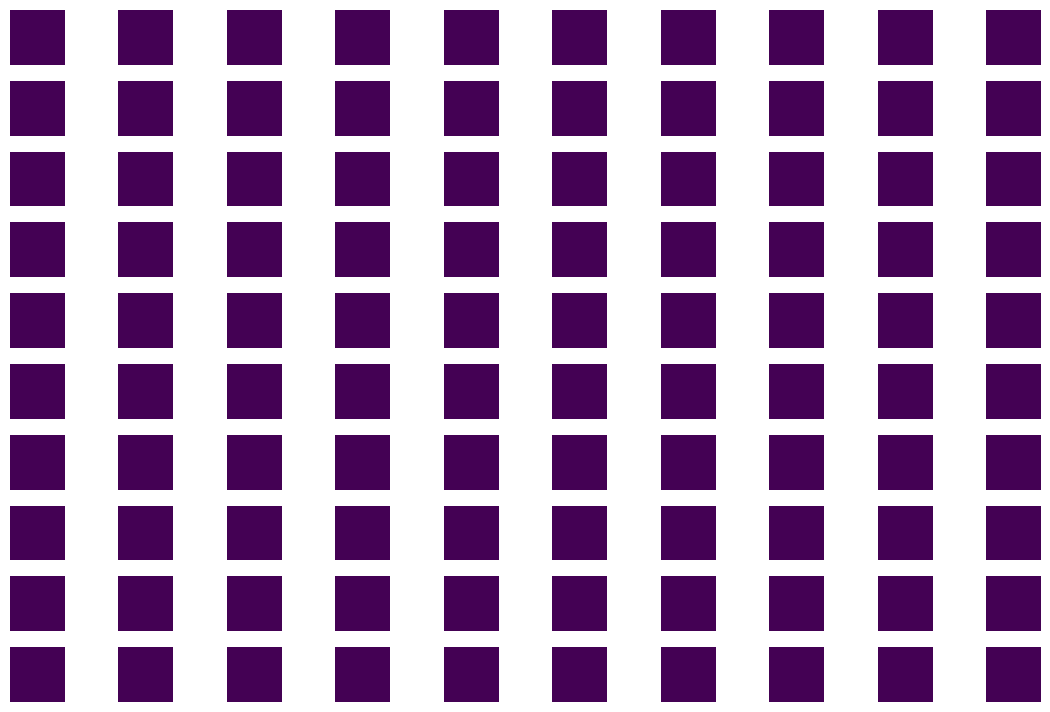

In [9]:
print("Weight map before training")

# Remember all weights start with 0
model = newModel()
model.forward(imgs.as_in_context(CTX))

fc1 = model[0].getLayers()[0]
utils.helper.viewFCWeights(fc1)

In [10]:
def train(
        name: str,
        loader: DataLoader = data,
        lossTarget=0.15,
        maxEpochs=100,
        aug=lambda v: v
) -> Sequential:
    model = newModel()

    filePath = f"{os.getcwd()}/{MODEL_CHKPNT}/{name}.model"

    try:
        model.load_parameters(filePath)
        print(f">> model loaded from: {filePath}")
    except Exception as ee:
        print(f">> model being learned from scratch: {filePath}")

        optimizer = glu.Trainer(model.collect_params(), 'sgd', {'learning_rate': 0.01})

        # cc = 0
        for epoch in range(maxEpochs):
            sumLoss = 0
            for imgs, labels in loader:
                # print(f"loading batch {cc} - of {imgs.shape[0]}")
                # cc += 1
                imgs = imgs.squeeze(axis=(1,))

                imgs, labels = aug((imgs, labels))
                imgs = imgs.as_in_context(CTX)
                labels = labels.as_in_context(CTX)

                with autograd.record():
                    output = model.forward(imgs)
                    loss = lossFn(output, labels)

                loss.backward()
                sumLoss += loss.mean().asscalar()

                optimizer.step(imgs.shape[0] / 2)

            else:
                print(f"Training loss: {sumLoss / len(loader)}")

            if sumLoss / len(loader) <= lossTarget:
                break

        os.makedirs(Path(filePath).parent, exist_ok=True)
        model.save_parameters(filePath)
        print(f">>> model saved to: {filePath}")

    return model

In [11]:
model = train("raw")

logits = model.forward(auggedUp.as_in_context(CTX))
ps = mx.ndarray.softmax(logits, axis=1)

>> model loaded from: /home/peng/git/convnet-abstraction/slide/.model_checkpoints/raw.model


Trained on raw MNIST dataset


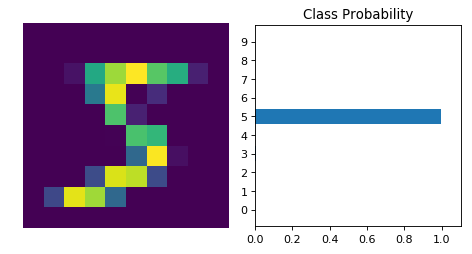

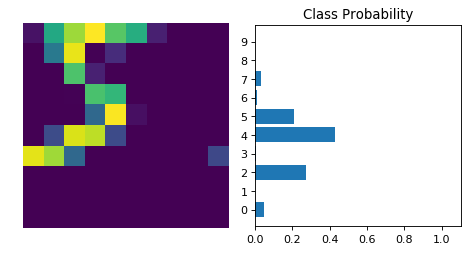

In [12]:
print("Trained on raw MNIST dataset")

utils.helper.view_classify(auggedUp[0], ps[0])
utils.helper.view_classify(auggedUp[88], ps[88])

Weight map after training on raw MNIST dataset


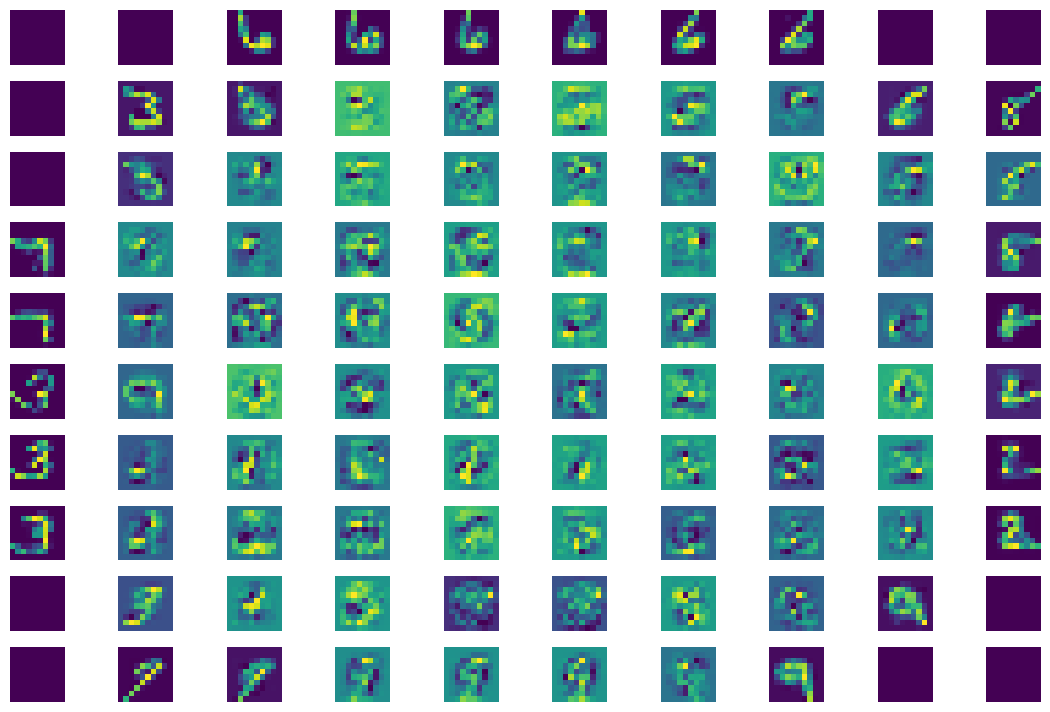

In [13]:
print("Weight map after training on raw MNIST dataset")

fc1 = model[0].getLayers()[0]
utils.helper.viewFCWeights(fc1)

In [14]:

# now let's enable augmentation

augModel = train("aug", aug=augmenter.augFirstTuple)

>> model loaded from: /home/peng/git/convnet-abstraction/slide/.model_checkpoints/aug.model


Weight map after training on AUGMENTED MNIST dataset


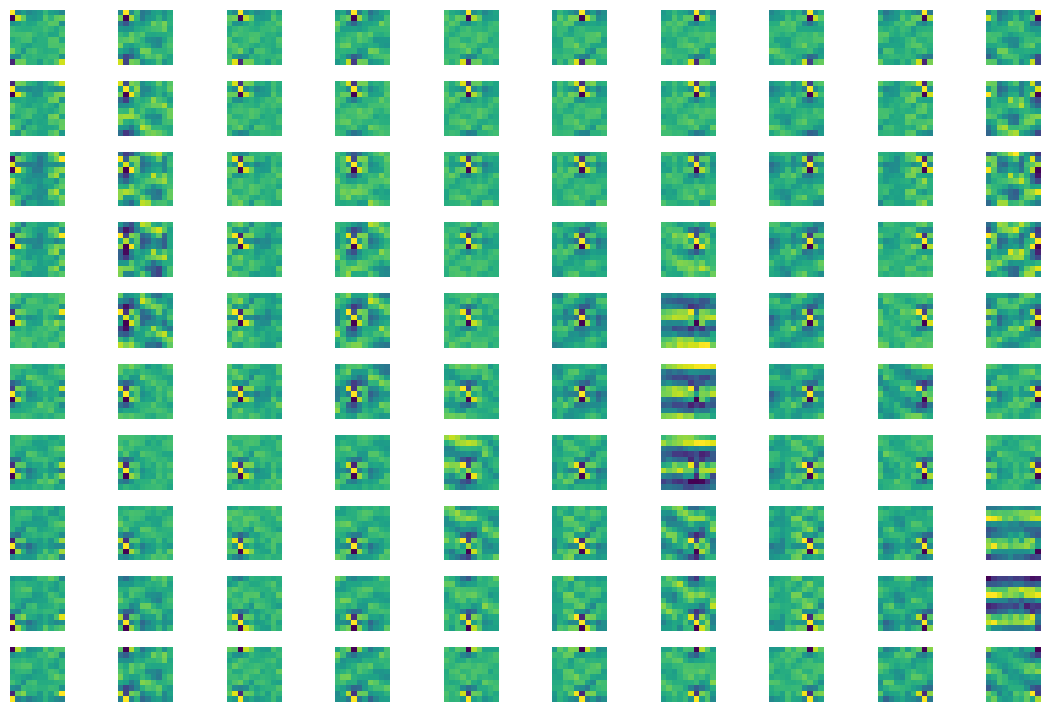

In [16]:
print("Weight map after training on AUGMENTED MNIST dataset")

fc1 = augModel[0].getLayers()[0]
utils.helper.viewFCWeights(fc1)

## Data Augmentation

- How did this happen? (you probably want to try this on neural-ODE)

<img src="assets/jon-batiste-reaction.gif">

In [17]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import os
import sys
from typing import Tuple

from dataclasses import dataclass

if '' in sys.path:
    sys.path.remove('')

module_path = os.path.abspath(os.path.join('../python'))
if module_path not in sys.path:
    sys.path.append(module_path)

import networkx as nx

from graphPlot import drawGraph, setCanvas
from const import *

setCanvas()

## Data Augmentation

---

- Form a group $\Bigg \{ A_{ug}, U_{ga}, G_{au} ...... \Bigg \}$, sometimes not commutative/Abelian

- $\subset \text{unary operator}: Signal \Longrightarrow Signal $ (making it a group action)
    
- $\subset \text{**higher-order function**}$

## Data Augmentation

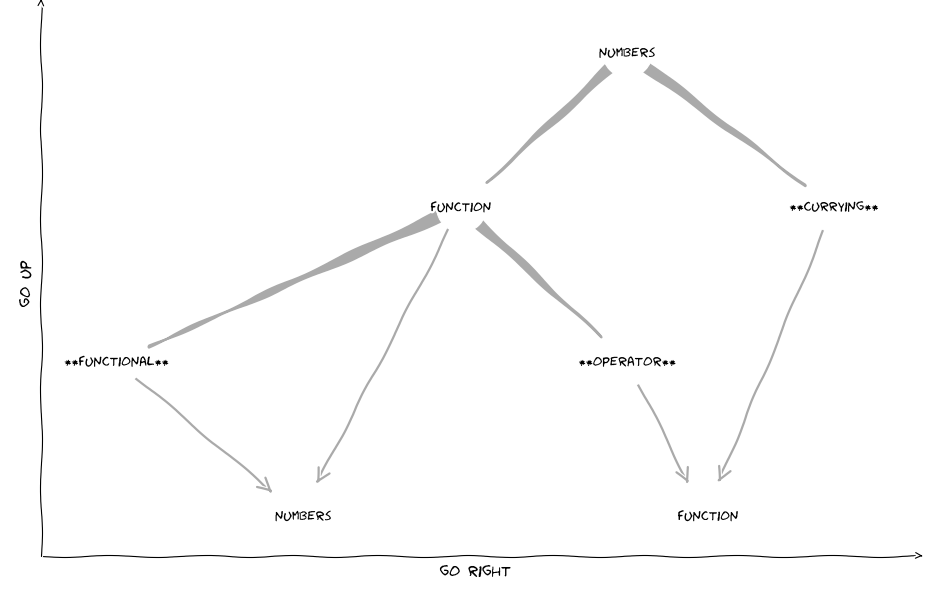

In [19]:

g = nx.DiGraph(directed=True)

n = 'numbers'
n2 = ' numbers'
f = 'function'
f2 = ' function'
o = '**operator**'
c = '**currying**'
fl = '**functional**'

g.add_nodes_from([n])
g.add_nodes_from([f, fl, o, c])
g.add_nodes_from([n2, f2])

g.add_edge(n, f, wedge=True)
g.add_edge(f, n2)
g.add_edge(f, o, wedge=True)
g.add_edge(o, f2)
g.add_edge(f, fl, wedge=True)
g.add_edge(fl, n2)
g.add_edge(n, c, wedge=True)
g.add_edge(c, f2)

drawGraph(g, font_family='humor sans',  arrow='-|>')

plt.show()

## Data Augmentation $\Longrightarrow$ G-ConvNet

**Lemma**: If the augmentation group $\{ A_{ug} \}$ satisifes:

- **Transitivity**: for any pair of points $x, y$ and any function $f$, we can always find an augmentation that can transform value $f(x)$ to point $y$
- **Group Equivariance**: applying an augmentation $A_{ug}$ on the input has the same effect as applying an augmentation $U_{ga}$ from the same group on the output

Then a fully connected layer:

$$
f_+(y) = <f(x), w(x, y)> _x
$$

collapses to a group convolution (**G-conv**) layer:

$$
f_+(y) = < \bbox[yellow]{A_{ug} \circ f(x)}, w_0(x)> _x
$$

---

Looks familiar?

$$
conv(f(- \Delta), w_0(\Delta)) = corr(f(\Delta), w_0(\Delta)) = <\bbox[yellow]{f(\Delta + x)}, w_0(x)> _x
$$



## Data Augmentation $\Longrightarrow$ G-ConvNet

$$
f_+(y) = < A_{ug} \circ f(x), w_0(x)> _x
$$

---

In short:

# A ConvNet layer is just an augmented Linear/Fully-Connected layer!

## Data Augmentation - Transitivity

**Transitivity**: for any pair of points $x, y$ and any function $f$, we can always find an augmentation that can transform value $f(x)$ to point $y$

$$
\forall x : f(x) = \Big( A_{ug} \circ f \Big) (x_0)
$$

## Data Augmentation - Transitivity

- Effectively means the augmentation group is the 'carriage' to move reference frame around the observer

<img src="assets/fcnd-frame.png" style="height: 350px;">

--- 

[*] Image courtesy: udacity.com

## Data Augmentation - Equivariance

Plain old **Equivariance**: applying an augmentation $A_{ug}$ on the input has the same effect as applying $A_{ug}$ on the output

$$
A_{ug} \circ f_+(y) = <A_{ug} \circ f(x), w(x, y)> _x
$$

## Data Augmentation - Equivariance

- example: SQL prediate pushdown
- example: first input & final output of Masked-CNN & Autoencoder (& maybe Style Transfer)

<table>
<tr>
    <td><img src="assets/maskedCNN2.png" style="height: 300px;">
    </td><td><img src="assets/maskedCNN1.png" style="height: 300px;"></td>
</tr>
</table>


## Data Augmentation - Group Equivariance

**Group Equivariance**: applying an augmentation $A_{ug}$ on the input has the same effect as applying an augmentation **$U_{ga}$ from the same group** on the output

$$
U_{ga} \circ f_+(y) = <A_{ug} \circ f(x), w(x, y)> _x
$$

---

- Relaxed a bit comparing to Plain old equivariance
- Effectively means that the architecture of the first layer can be carried over to the subsequent layers with little changes, applied on high-level features


## Data Augmentation - Group Equivariance

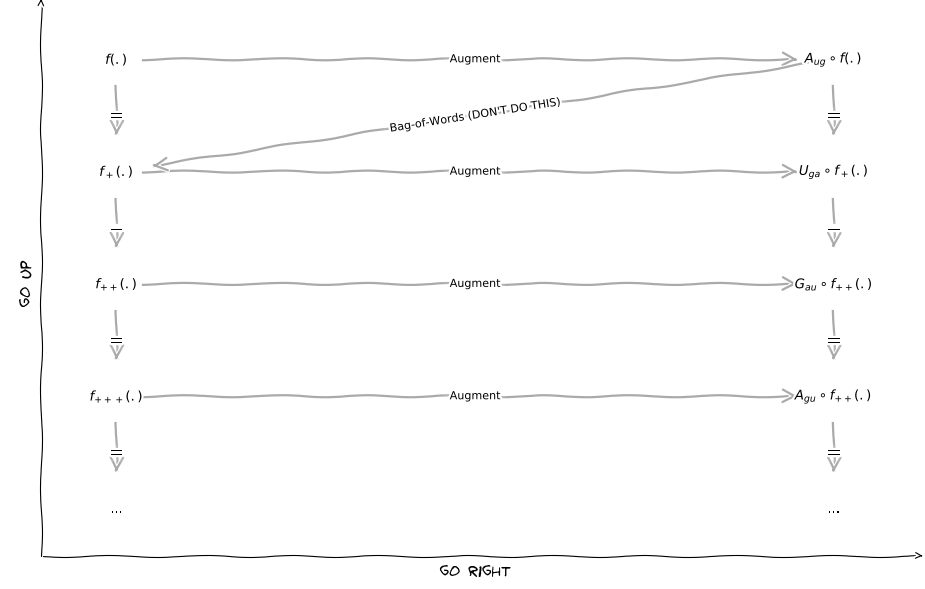

In [20]:

g = nx.DiGraph(directed=True)

fs = [
    "$f(.)$",
    "$f_+(.)$",
    "$f_{++}(.)$",
    "$f_{+++}(.)$",
    "..."
]

afs = [
    "$A_{ug} \circ f(.)$",
    "$U_{ga} \circ f_+(.)$",
    "$G_{au} \circ f_{++}(.)$",
    "$A_{gu} \circ f_{++}(.)$",
    " ... "
]

for i in range(0, 4):
    g.add_edge(fs[i], fs[i + 1], text='||')
    g.add_edge(afs[i], afs[i + 1], text='||')
#     g.add_edge(fs[i], afs[i])

g2 = g.copy()

for i in range(0, 4):
    g2.add_edge(fs[i], afs[i], text='Augment')

g2.add_edge(afs[0], fs[1], text='Bag-of-Words (DON\'T DO THIS)')

drawGraph(g2, layoutG=g)

plt.show()

## *Data Augmentation $\Longrightarrow$ G-ConvNet - Proof*

- **Transitivity**:

$$
\forall x : f(x) = \Big( \bar{A}_{ug} \circ f \Big) (x_0)
$$

- **Group equivariance**

$$
U_{ga} \circ f_+(y) = <A_{ug} \circ f(x), w(x, y)> _x
$$

**Combining all together**:

$$
f_+(y) = \Big( \bar{U}_{ga} \circ f_+ \Big)(y_0) = <\bar{A}_{ug} \circ f(x), w(x, y_0)> _x = <\bbox[yellow]{\bar{A}_{ug} \circ f(x)}, w_0(x)> _x
$$

---

[*] More rigorous proof: R. Kondor and S. Trivedi, “On the Generalization of Equivariance and Convolution in Neural Networks to the Action of Compact Groups” 2018

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import sys
from typing import Tuple

from dataclasses import dataclass

if '' in sys.path:
    sys.path.remove('')

module_path = os.path.abspath(os.path.join('../python'))
if module_path not in sys.path:
    sys.path.append(module_path)

import networkx as nx

from graphPlot import drawGraph, setCanvas
from const import *

setCanvas()

## G-ConvNet

$$f_+(y) = <A_{ug} \circ f(x), w_0(x)> _x$$

- this implies bijection/isomorphism $y \longleftrightarrow A_{ug}$
- ... and high-level features usually have more dimensions $\{x\} \subset \{y\}$

---

All of the followings are concrete subclasses:


Augmentation types | Answer
 --- | --- 
2d translation | ConvNet
**others** | **G-ConvNet**
- 2d translation + 90$^{\circ}$ rotation | Group Equivariant CNNs
- 2d translation + rotation | Harmonic Net
- 3d rotation | Spherical CNNs
- 3d translation + rotation | Tensor Field Net



## ConvNet

| - | Input $f(x)$ | High-level $f_+(y)$, $f_{++}(z)$, ... | Augmentation $A_{ug}$, $U_{ga}$, ...
| ---|---------------|----------------|-------------------------------
| domain | $R^2$         | $R^2$          | $R^2$ (translation only)

---

- First of its kind but not the last
- A rare case when high-level feature domain $\{y\} = \{x\}$, in all other cases $\{y\} \supset \{x\}$

<img src="assets/alexnet.png">


## ConvNet

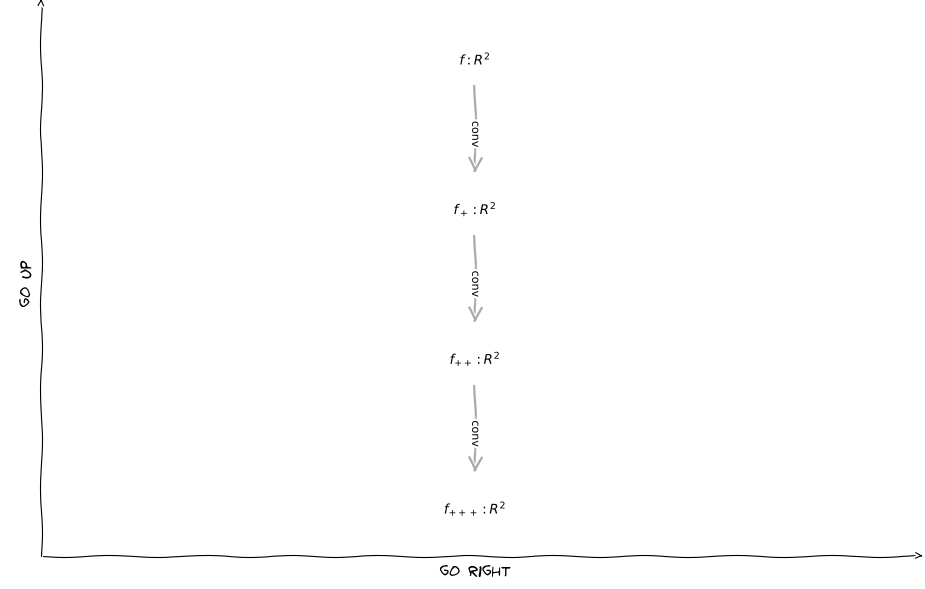

In [3]:
g = nx.DiGraph(directed=True)

nodes = [
    "$f: R^2$",
    "$f_+: R^2$",
    "$f_{++}: R^2$",
    "$f_{+++}: R^2$"
]

for i in range(0, len(nodes) - 1):
    g.add_edge(nodes[i], nodes[i + 1], text="conv")

drawGraph(g)

plt.show()

## Group Equivariant CNNs (ICML 2016*)

| - | Input $f(x)$ | High-level $f_+(y)$, $f_{++}(z)$, ... | Augmentation $A_{ug}$, $U_{ga}$, ...
| --- |---|---|---
| domain | $R^2$ | $R^2 \times p4$ | $R^2 \times p4$ (translation, rotation $\pm 90^{\circ}$)

---

- change looks trivial

<img src="assets/r2p4.png" width="500">

---

[*] T. S. Cohen and M. Welling, “Group Equivariant Convolutional Networks,” ICML 2016.

## Group Equivariant CNNs (ICML 2016*)

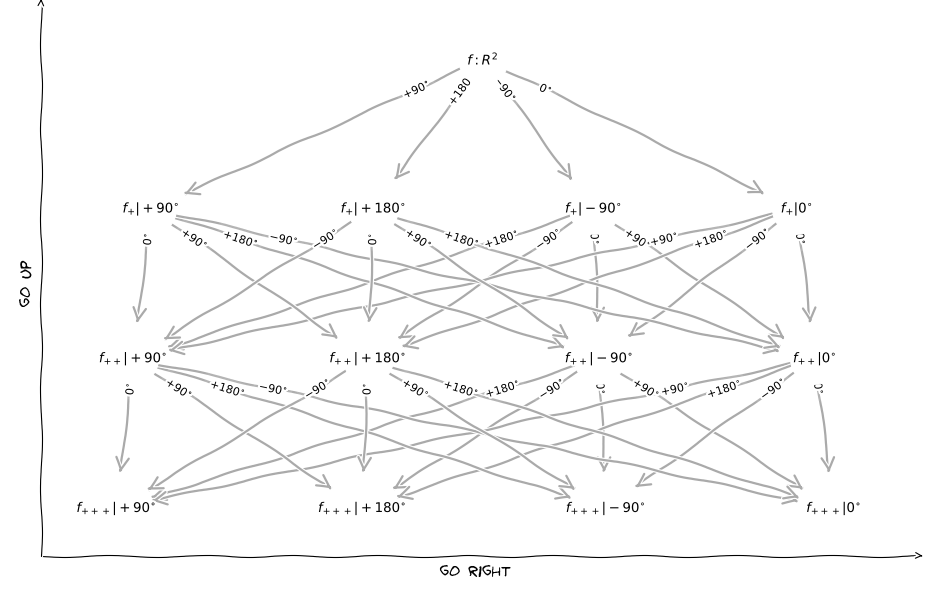

In [4]:
g = nx.DiGraph(directed=True)

tail = "$f: R^2$"

angles = [-90, 0, 90, 180]


def regularize(v: int) -> int:
    if v > 180:
        return regularize(v - 360)
    elif v <= -180:
        return regularize(v + 360)
    else:
        return v


def repr(v: int) -> str:
    r = regularize(v)
    if r > 0:
        return f"+{str(r)}^{{\circ}}"
    else:
        return f"{str(r)}^{{\circ}}"


sub = "+"
subPlus = ""

for i in angles:
    node = f"$f_{{{sub}}} | {repr(i)}$"
    g.add_edge(tail, node, text=f"${repr(i)}$")

for epoch in range(1, 3):
    subPlus = f"{sub}+"
    for i in angles:
        for j in angles:
            prev = f"$f_{{{sub}}} | {repr(i)}$"
            node = f"$f_{{{subPlus}}} | {repr(j)}$"
            g.add_edge(prev, node, text=f"${repr(j - i)}$")
    sub = subPlus

drawGraph(g, font='humor sans', label_pos=0.8)

plt.show()

## Group Equivariant CNNs (ICML 2016*) - Alternatively

| - | Input $f(x)$ | High-level $f_+(y)$, $f_{++}(z)$, ... | Augmentation $A_{ug}$, $U_{ga}$, ...
| --- |---|---|---
| domain | $R^2$ | $R^2 \times p4m$ | $R^2 \times p4m$ (translation, rotation $\pm 90^{\circ}$, flipping)

---

- Size of filter bank start to become annoying, but still acceptable.

<img src="assets/r2p4m.png" width="500">

---

[*] T. S. Cohen and M. Welling, “Group Equivariant Convolutional Networks,” ICML 2016.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import sys
from typing import Tuple

from dataclasses import dataclass

if '' in sys.path:
    sys.path.remove('')

module_path = os.path.abspath(os.path.join('../python'))
if module_path not in sys.path:
    sys.path.append(module_path)

import networkx as nx

from graphPlot import drawGraph, setCanvas
from const import *

setCanvas()

## Harmonic Net (CVPR 2017*)

| - | Input $f(x)$ | High-level $f_+(y)$, $f_{++}(z)$, ... | Augmentation $A_{ug}$, $U_{ga}$, ...
| --- |---|---|---
| domain | $R^2$ | $O(2)$ | $O(2) \cong R^2 \times SO(2)$ (translation, arbitrary rotation)

---

- Size of the filter bank become intolerably big, can't take it any more

- First algorithm to use **spectral decomposition as a weight compressor**

| <img src="assets/hnet.gif"> |
| :---: |

---

[*] D. E. Worrall, S. J. Garbin, D. Turmukhambetov, and G. J. Brostow, “Harmonic Networks: Deep Translation and Rotation Equivariance” CVPR 2017, vol. 2017–Jan, pp. 7168–7177.

## Going Spectral

- function is like infinite-dimension vector

- Spectral decomposition for functions is like eigen-decomposition for vectors

---

*orthonormal basis*: given a function domain $X \longrightarrow C$, there may exist a (likely infinite) series of bases ${u_1, u_2, ...}$ that are both:

- **complete**: linear combination can approximate arbitrary function on the domain
    
$$
f(.) = \sum_{\forall m} \phi_m u_m(.) = \Big[ \phi_1, \phi_2, ... \Big]
\begin{bmatrix}
    u_1(.) \\
    u_2(.) \\
    ...
\end{bmatrix}
$$


## Going Spectral

- function is like infinite-dimension vector

- Spectral decomposition for functions is like eigen-decomposition for vectors

---
- and **orthonormal**: have unit norms and orthogonal to each other

$$
<u_m(.), u_n(.)> = I_{mn} \text{  (Kronecker delta)}
$$

- ... which implies:

$$
\phi_m = \widehat{f}(m) = <f(.), u_m(.)> \text{  (GFT)}
$$

## Going Spectral - What's the point?

It makes a few things easier:

- Convolution theorem still works in most cases! a.k.a. **G-conv theorem**

$$
\widehat{f_+}(m) = < \widehat{A_{ug}}(m) \circ \widehat{f}(m), \widehat{w_0}(m) >_m
$$

(This makes dot product and G-conv much faster)

- Most G-ConvNet features are smooth on all dimensions

(This means low-frequency coefficients can compress high-dimension filter banks)

## *G-conv Theorem - Proof*

---

\begin{align}
& & f_+(y) &= <A_{ug} \circ f(x), w_0(x)>_x \\
& & &= \sum_m \sum_n \widehat{A_{ug} \circ f}(m) \widehat{w_0}(j) <u_m(.), u_n(.)> \\
&\text{(orthonormal)} & &= \sum_m \widehat{A_{ug} \circ f}(m) \widehat{w_0}(m) \\
&\text{(GFT)} & &= \sum_m < A_{ug} \circ f(x), u_m(x) >_x \cdot < w_0(x), u_m(x) >_x
\end{align}

---

[*] More rigorous proof for $SO(3)$ case: T. S. Cohen, M. Geiger, J. Koehler, and M. Welling, “Spherical CNNs,” no. 3, pp. 1–15, 2018.

## *G-conv Theorem - Proof*

---

If luckily $A_{ug}$ is linear:

\begin{align}
&\text{(bijectory)} & \widehat{f_+}(n) &= \sum_m \Big< < \bbox[yellow]{A_{ug}(y)} \circ f(x), u_m(x) >_x \Big| u_n(y) \Big>_y \cdot < w_0(x), u_m(x) >_x \\
&\text{(linear)} & &= \sum_m < u_n(y), A_{ug}(y)>_y \circ < f(x), u_m(x) >_x \cdot < w_0(x), u_m(x) >_x \\
& & &= < \widehat{A_{ug}}(n) \circ \widehat{f}(m), \widehat{w_0}(m) >_m\\
& \text{(IFF $A_{ug}$ is distance-preserving)} & &= <\widehat{f}(m), \widehat{A_{ug}^{-1}}(n) \circ \widehat{w_0}(m) >_m 
\end{align}

## Harmonic Net (CVPR 2017*)

| - | Input $f(x)$ | High-level $f_+(y)$, $f_{++}(z)$, ... | Augmentation $A_{ug}$, $U_{ga}$, ...
| --- |---|---|---
| domain | $R^2$ | $O(2)$ | $O(2) \cong R^2 \times SO(2)$ (translation, arbitrary rotation)

---

- $u_m(x) \longleftarrow e^{m x}$ (2D Fourier series, x is a complex number)
- GFT $\longleftarrow$ FFT (with Gaussian resampling)
- number of coefficients $\longleftarrow 2$: $m \in {0, 1}$

---

[*] D. E. Worrall, S. J. Garbin, D. Turmukhambetov, and G. J. Brostow, “Harmonic Networks: Deep Translation and Rotation Equivariance” CVPR 2017, vol. 2017–Jan, pp. 7168–7177.

## Harmonic Net (CVPR 2017*)

---

Orthonormal bases (without radial):

<img src="assets/hnet-bases.png" style="height: 350px;">

---

[*] D. E. Worrall, S. J. Garbin, D. Turmukhambetov, and G. J. Brostow, “Harmonic Networks: Deep Translation and Rotation Equivariance” CVPR 2017, vol. 2017–Jan, pp. 7168–7177.

## Harmonic Net (CVPR 2017*)

---

Orthonormal bases (with radial):

<img src="assets/fourier-full.png" style="height: 350px;">

---

[*] Image courtesy: C. E. Coleman-Smith, H. Petersen, and R. L. Wolpert, “Classification of initial state granularity via 2d Fourier Expansion” Apr. 2012.

## Harmonic Net (CVPR 2017*)

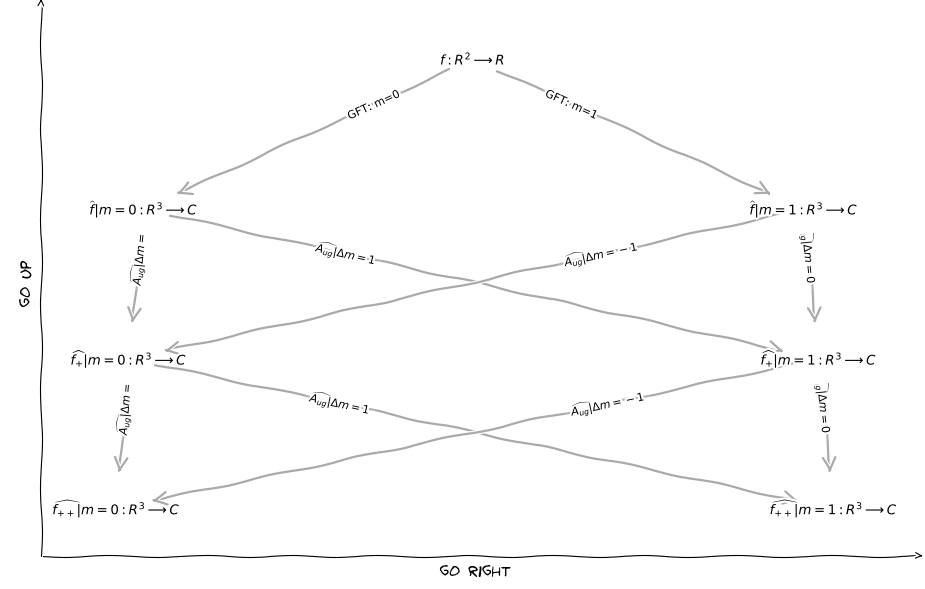

In [3]:
g = nx.DiGraph(directed=True)

tail = "$f: R^2 \longrightarrow R$"

angles = [0, 1]


def repr(r: int) -> str:
    if r > 0:
        return f"{str(r)}"
    else:
        return f"{str(r)}"


sub = ""
subPlus = ""


def getNode(sub, i):
    return f"$\widehat{{f_{{{sub}}}}} | m={repr(i)}: R^3 \longrightarrow C$"


for i in angles:
    node = getNode(sub, i)
    g.add_edge(tail, node, text=f"GFT: m=${repr(i)}$")

for epoch in range(1, 3):
    subPlus = f"{sub}+"
    for i in angles:
        for j in angles:
            prev = getNode(sub, i)
            node = getNode(subPlus, j)
            g.add_edge(prev, node, text=f"$\widehat{{A_{{ug}}}} | \Delta m={repr(j - i)}$")
    sub = subPlus

drawGraph(g, font='humor sans', label_pos=0.7)

plt.show()

## Spherical CNNs (ICLR 2018* best paper)

You can use many cameras for situation awareness

<img src="assets/tesla-cameras.png" style="height: 400px;">

---

[*] Image Courtesy: https://www.tesla.com/en_CA/autopilot

## Spherical CNNs (ICLR 2018* best paper)

... Or you can use few fisheye camera(s)

<img src="assets/drone-fisheye.png" style="height: 400px;">

---

[*] Image courtesy: DJI-X https://www.halfchrome.com/dji-360-drone/

## Spherical CNNs (ICLR 2018* best paper)

Instead ...

<img src="assets/beholder.jpg" style="height: 400px;">

---

[*] Image Courtesy: Skydio R1 https://www.skydio.com/technology/


## Spherical CNNs (ICLR 2018* best paper)

Instead ...

<img src="assets/skydioR1.jpg">

---

[*] Image Courtesy: Skydio R1 https://www.skydio.com/technology/


## Spherical CNNs (ICLR 2018* best paper)

| - | Input $f(x)$ | High-level $f_+(y)$, $f_{++}(z)$, ... | Augmentation $A_{ug}$, $U_{ga}$, ...
| --- |---|---|---
| domain | $S^2$ | $SO(3)$ | $SO(3) \cong SU(2)$ (3d rotation)

---

- $u_m(x) \longleftarrow D_m(x)$ (Wigner-D function, $x$ is an Euler-angle tuple or quaternion)
    - collapses to spherical harmonics on the first layer
- GFT $\longleftarrow$ SO(3) FFT
- number of coefficients $\leq 25$: $l \in [0, 4]$ (increasing beyond that contributes little to accuracy)

---

[*] T. S. Cohen, M. Geiger, J. Koehler, and M. Welling, “Spherical CNNs,” no. 3, pp. 1–15, 2018.

## Spherical CNNs (ICLR 2018* best paper)

| - | Input $f(x)$ | High-level $f_+(y)$, $f_{++}(z)$, ... | Augmentation $A_{ug}$, $U_{ga}$, ...
| --- |---|---|---
| domain | $S^2$ | $SO(3)$ | $SO(3) \cong SU(2)$ (3d rotation)

---

<img src="assets/sh_basis.png" style="height: 400px;"> 

---

[*] T. S. Cohen, M. Geiger, J. Koehler, and M. Welling, “Spherical CNNs,” no. 3, pp. 1–15, 2018.

## Spherical CNNs (ICLR 2018* best paper)

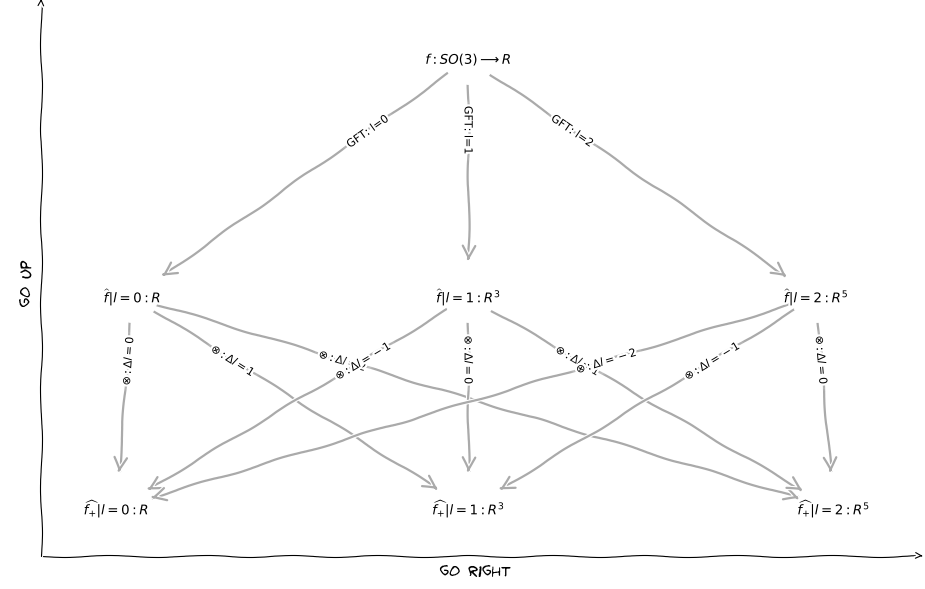

In [4]:
g = nx.DiGraph(directed=True)

tail = "$f: SO(3) \longrightarrow R$"

angles = [0, 1, 2]


def repr(r: int) -> str:
    if r > 0:
        return f"{str(r)}"
    else:
        return f"{str(r)}"


sub = ""
subPlus = ""


def getExp(i):
    j = 2*i + 1
    if j == 1:
        return ""
    else:
        return f"^{str(j)}"

def getNode(sub, i):
    return f"$\widehat{{f_{{{sub}}}}} | l={repr(i)}: R{getExp(i)}$"


for i in angles:
    node = getNode(sub, i)
    g.add_edge(tail, node, text=f"GFT: l=${repr(i)}$")

for epoch in range(1, 2):
    subPlus = f"{sub}+"
    for i in angles:
        for j in angles:
            prev = getNode(sub, i)
            node = getNode(subPlus, j)
            g.add_edge(prev, node, text=f"$\otimes: \Delta l={repr(j - i)}$")
    sub = subPlus

drawGraph(g, font='humor sans', label_pos=0.7)

plt.show()

## Tensor Field Network (Not Peer Reviewed!)

| - | Input $f(x)$ | High-level $f_+(y)$, $f_{++}(z)$, ... | Augmentation $A_{ug}$, $U_{ga}$, ...
| --- |---|---|---
| domain | $R^3$ | $O(3)$ | $O(3) \cong R^3 x SO(3)$ (3d translation & rotation)

---

- $u_m(x) \longleftarrow D_m(x)$ (Wigner-D function, $x$ is an Euler-angle tuple or quaternion)
    - collapses to spherical harmonics on the first layer
- GFT $\longleftarrow$ SO(3) FFT
- number of coefficients $\longleftarrow 4$: $l \in {0, 1}$
- C-G transformation is used to accelerate G-conv in frequency space
    - which was not needed in Spherical CNNs due to lack of radial component



## Tensor Field Network (Not Peer Reviewed!)

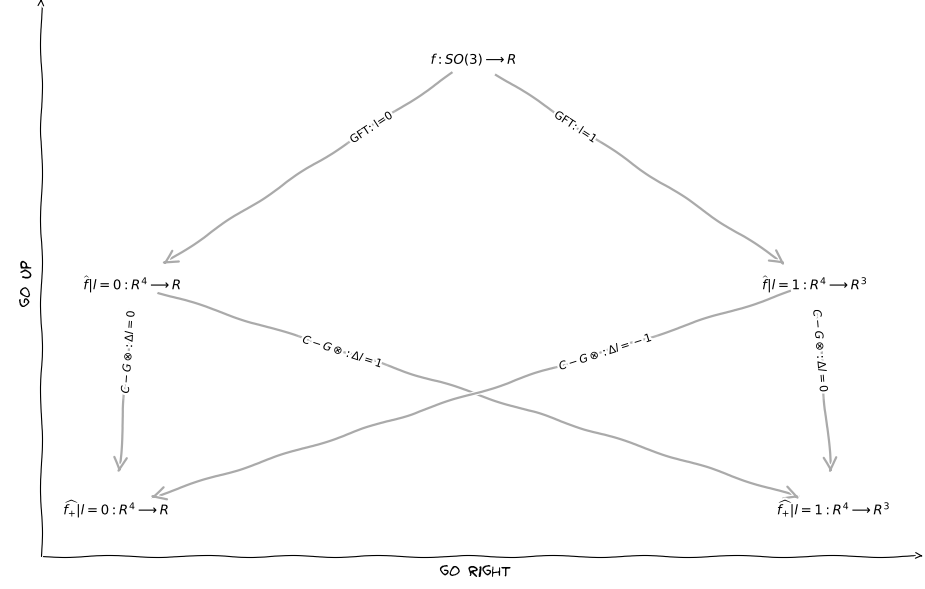

In [5]:
g = nx.DiGraph(directed=True)

tail = "$f: SO(3) \longrightarrow R$"

angles = [0, 1]


def repr(r: int) -> str:
    if r > 0:
        return f"{str(r)}"
    else:
        return f"{str(r)}"


sub = ""
subPlus = ""


def getExp(i):
    j = 2*i + 1
    if j == 1:
        return ""
    else:
        return f"^{str(j)}"

def getNode(sub, i):
    return f"$\widehat{{f_{{{sub}}}}} | l={repr(i)}: R^4 \longrightarrow R{getExp(i)}$"


for i in angles:
    node = getNode(sub, i)
    g.add_edge(tail, node, text=f"GFT: l=${repr(i)}$")

for epoch in range(1, 2):
    subPlus = f"{sub}+"
    for i in angles:
        for j in angles:
            prev = getNode(sub, i)
            node = getNode(subPlus, j)
            g.add_edge(prev, node, text=f"$C-G \otimes: \Delta l={repr(j - i)}$")
    sub = subPlus

drawGraph(g, font='humor sans', label_pos=0.7)

plt.show()